In [1]:
import os, re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
import pandas as pd
from mpl_toolkits import mplot3d

In [2]:
def sep_ponct(my_str, rule = r"([.,?!])"):
    """separer les mots avec les char de ponctuation"""
    #print(my_str)
    sp0 = re.split(rule, my_str)
    sp1 = [data.strip() for data in sp0]
    res = [data for data in sp1 if (data != '') ]
    return res

In [3]:
data=pd.read_csv('data.tsv',sep='\t')
dataQ=data.Question
Q=[]
Q2W=[]# liste de mots pour chaque phrase 
for i in range(len(dataQ)):
    Q.append(dataQ[i])
    
for each in Q: #type(each) == str
    #print(type(each),each)
    each_list = sep_ponct(each)
    remisEsp = ' '.join(each_list)
    #print(remisEsp.split(" "),'\n')
    Q2W.append(remisEsp.split(" "))
#print(Q2W)

In [4]:
data.describe()

,Question,Answer
count,10559,10559
unique,10191,826
top,Tell me a joke,It's nice to have things you love.
freq,46,299


In [5]:
import gensim, logging

In [6]:
window_size=2
N=len(Q2W)
vector_size=3
model=gensim.models.Word2Vec(Q2W,vector_size=vector_size, window=2, min_count=1, workers=4)

In [7]:
V=[]
for i in range (N):
    s=np.zeros(vector_size)
    for j in range(len(Q2W[i])):
        wv=np.array(model.wv.get_vector(Q2W[i][j]))
        s+=wv
    V.append(list(s))
print(V[1])

[-3.8796502500772476, 14.006469309329987, 16.146751523017883]


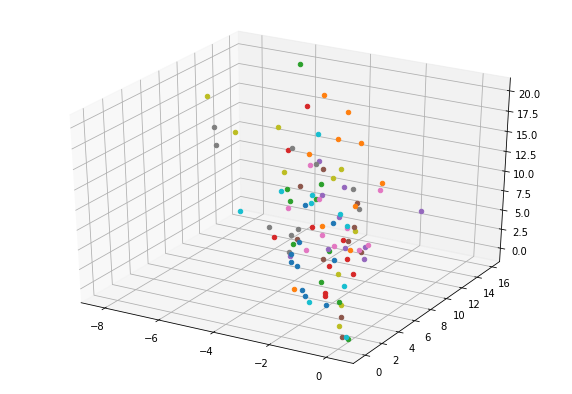

In [8]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
for i in range(100):
    #ax.scatter3D(V[i][0],V[i][1],V[i][2],label=Q2W[i])
    ax.scatter3D(V[i][0],V[i][1],V[i][2])

#plt.legend()